In [1]:
!pip install git+https://github.com/jpmorganchase/QOKit.git
!pip install qiskit[visualization] qiskit-optimization qiskit-aer
!pip install mqt.bench
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jpmorganchase/QOKit.git to /tmp/pip-req-build-9pmm4_6a
  Running command git clone --filter=blob:none --quiet https://github.com/jpmorganchase/QOKit.git /tmp/pip-req-build-9pmm4_6a
  Resolved https://github.com/jpmorganchase/QOKit.git to commit c0847d291d7a9fd5ffa4b979f0418d215037a8f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
zsh:1: no matches found: qiskit[visualization]
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable



### **Q1: Evaluating the Effectiveness of Native Gate Sets Across Quantum Hardware Platforms  [6 points]**


---


Consider the following four quantum hardware platforms, each with its own native gate set:

1. IBM (Superconducting)
2. IonQ (Trapped Ions)
3. Quantinuum (Trapped Ions)

**(a)** Using a **technology-agnostic benchmarking approach**, identify which platform’s native gate set is **most effective** in minimizing **circuit depth** and **gate count** across a range of quantum algorithms and problem sizes. Please follow, the following steps

1. **Generate and compile circuits** for the above benchmarks using the MQT Bench tool:  
* https://github.com/cda-tum/mqt-bench
   

2. **Compile each benchmark circuit** to the native gate set of each platform using MQT bench, use benchmarks with qubits 5,10,15,25, 35, 45.
* https://mqt.readthedocs.io/projects/bench/en/latest/Parameter.html




**(b)** Estimate the SWAP overhead for each benchmark for IonQ Aria 1 (25 Qubits),
Quantinuum H2 (32 Qubits), and  IBM Montreal (27 Qubits). Use the connectivity map in the code window below for the machines.



and use the following table to estimate the execution time for benchmarks with qubits 5,10,15,25, 35. Use qiskit's mapping and routing pass. Note use the connectivity specified below, we have altered for pedagogical purposes.

| Platform           | Native Gates                   | Connectivity       | 1Q Gate Time | 2Q Gate Time | Coherence Time (T₁/T₂)     | Readout Latency |
|--------------------|--------------------------------|--------------------|--------------|--------------|-----------------------------|------------------|
| **IonQ Aria 1**    | Arbitrary 1Q, **XX(θ)**         | Somewhat Fully connected    | 10 µs        | 100 µs       | 1,000 ms / 1,000 ms         | 1 ms             |
| **Quantinuum H2**  | Arbitrary 1Q, **ZZ(θ)**         | Somewhat Fully connected    | 10 µs        | 150 µs       | 500 ms / 500 ms             | 1 ms             |
| **IBM Montreal**   | Rx(π/2), Rz(θ), **CX**          | Heavy-hex (sparse) | 20 ns        | 200 ns       | 100 µs / 100 µs             | 200 µs           |
           |

In [2]:

Quantinuum_H2_32=[
 (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7),
 (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
 (2, 3), (2, 4), (2, 5), (2, 6), (2, 7),
 (3, 4), (3, 5), (3, 6), (3, 7),
 (4, 5), (4, 6), (4, 7),
 (5, 6), (5, 7),
 (6, 7),
 (7, 8),  # inter-group connection

 (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15),
 (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15),
 (10, 11), (10, 12), (10, 13), (10, 14), (10, 15),
 (11, 12), (11, 13), (11, 14), (11, 15),
 (12, 13), (12, 14), (12, 15),
 (13, 14), (13, 15),
 (14, 15),
 (15, 16),  # inter-group connection

 (16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (16, 22), (16, 23),
 (17, 18), (17, 19), (17, 20), (17, 21), (17, 22), (17, 23),
 (18, 19), (18, 20), (18, 21), (18, 22), (18, 23),
 (19, 20), (19, 21), (19, 22), (19, 23),
 (20, 21), (20, 22), (20, 23),
 (21, 22), (21, 23),
 (22, 23),
 (23, 24),  # inter-group connection

 (24, 25), (24, 26), (24, 27), (24, 28), (24, 29), (24, 30), (24, 31),
 (25, 26), (25, 27), (25, 28), (25, 29), (25, 30), (25, 31),
 (26, 27), (26, 28), (26, 29), (26, 30), (26, 31),
 (27, 28), (27, 29), (27, 30), (27, 31),
 (28, 29), (28, 30), (28, 31),
 (29, 30), (29, 31),
 (30, 31)
]


IonQ_25=[
 (0, 1), (0, 2), (0, 3), (0, 4),
 (1, 2), (1, 3), (1, 4),
 (2, 3), (2, 4),
 (3, 4),
 (4, 5),

 (5, 6), (5, 7), (5, 8), (5, 9),
 (6, 7), (6, 8), (6, 9),
 (7, 8), (7, 9),
 (8, 9),
 (9, 10),

 (10, 11), (10, 12), (10, 13), (10, 14),
 (11, 12), (11, 13), (11, 14),
 (12, 13), (12, 14),
 (13, 14),
 (14, 15),

 (15, 16), (15, 17), (15, 18), (15, 19),
 (16, 17), (16, 18), (16, 19),
 (17, 18), (17, 19),
 (18, 19),
 (19, 20),

 (20, 21), (20, 22), (20, 23), (20, 24),
 (21, 22), (21, 23), (21, 24),
 (22, 23), (22, 24),
 (23, 24)
]


edges_IBM_27 = [
    (0, 1), (1, 2), (2, 3),
    (3, 4), (4, 5), (5, 6),
    (6, 7), (7, 8), (8, 9),
    (1, 10), (3, 11), (5, 12), (7, 13), (9, 14),
    (10, 11), (11, 12), (12, 13), (13, 14),
    (10, 15), (11, 16), (12, 17), (13, 18), (14, 19),
    (15, 16), (16, 17), (17, 18), (18, 19),
    (15, 20), (16, 21), (17, 22), (18, 23), (19, 24),
    (20, 21), (21, 22), (22, 23), (23, 24),
    (21, 25), (23, 26)
]





(c) Estimate the fidelity using noisy simulation for the listed benchmarks for 5- and 10-qubit instances per platform. When estimating the fidelity model idling errors. Use equation (9) and (10) from https://arxiv.org/abs/1404.3747 , assume when gates have no operational dependence we can perform them in parallel and there is no crosstalk. Clearly state **Your conclusion:** Which hardware platform is most effective overall, and why?



| Platform           | 1Q Gate Fidelity       | 2Q Gate Fidelity       | Readout Fidelity                                  |
|--------------------|------------------------|-------------------------|----------------------------------------|
| **IonQ Aria 1**    | 99.9%                | 99%                 |  99.99% |
| **Quantinuum H2**  |  99.97%               | 98%                 |    99.99%        |
| **IBM Montreal**   |  99.9%                | 98.5%               | 97%


---

**Benchmarks:**  
Use the following **representative quantum applications** for your evaluations:

1. Amplitude Estimation (AE)  
2. Graph State Preparation (GSP)
3. Portfolio Optimization with QAOA (PoQAOA)  
4. Portfolio Optimization with VQE  (PoVQE)
5. Quantum Approximate Optimization Algorithm (QAOA)  
6. Quantum Fourier Transform (QFT)  
7. Quantum Neural Network (QNN)  
8. Variational Quantum Eigensolver (VQE)  
9. W-State Preparation (W-state)

---

In [ ]:
# !pip install pylatexenc

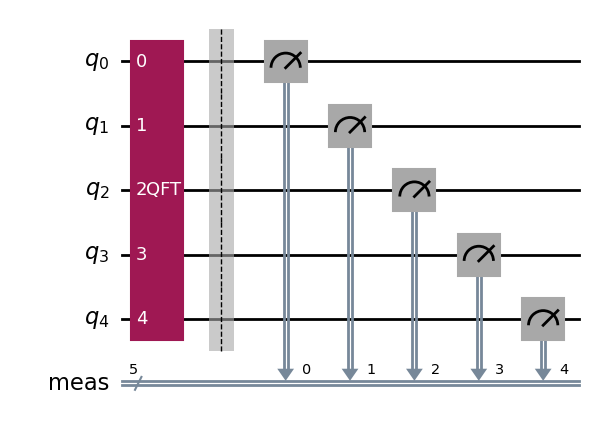

In [3]:
# check if mqt bench is working
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings, get_benchmark

# get a benchmark circuit on algorithmic level representing the GHZ state with 5 qubits
qc_algorithmic_level = get_benchmark(benchmark_name="qft", level="alg", circuit_size=5)

# draw the circuit
qc_algorithmic_level.draw('mpl')

In [4]:
from qiskit.transpiler.preset_passmanagers.plugin import PassManagerStagePluginManager

plugins = PassManagerStagePluginManager().routing_plugins.names()
print("Available routing plugins:", plugins)

Available routing plugins: ['basic', 'lookahead', 'none', 'sabre', 'stochastic']


# Q1A Code

In [18]:
# Add your code Q1a
import qiskit
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings
compiler_settings = CompilerSettings(
    qiskit=QiskitSettings(optimization_level=1),
    tket=TKETSettings(placement="lineplacement"),
)
result = {'ibm': [], 'ionq':[], 'quantinuum': []}
process = 0
for size in [5, 10, 15, 25, 35, 45]:
    for provider in ['ibm', 'ionq', 'quantinuum']:
        depth = 0
        gate_count = 0
        for benchmark in ['qft']:
            qc_native_gates_level = get_benchmark(
                benchmark_name=benchmark,
                level="nativegates",
                circuit_size=size,
                compiler="qiskit",
                compiler_settings=compiler_settings,
                provider_name=provider,
            )
            depth += qc_native_gates_level.depth()
            gate_count += sum(value for key, value in qc_native_gates_level.count_ops().items())
            process += 0.6
            print(f"Finished {provider}\'s {size} qubits {benchmark} benchmark: {process}%")
        result[provider].append((depth, gate_count))
print(result)
            


Finished ibm's 5 qubits qft benchmark: 0.6%
Finished ionq's 5 qubits qft benchmark: 1.2%
Finished quantinuum's 5 qubits qft benchmark: 1.7999999999999998%
Finished ibm's 10 qubits qft benchmark: 2.4%
Finished ionq's 10 qubits qft benchmark: 3.0%
Finished quantinuum's 10 qubits qft benchmark: 3.6%
Finished ibm's 15 qubits qft benchmark: 4.2%
Finished ionq's 15 qubits qft benchmark: 4.8%
Finished quantinuum's 15 qubits qft benchmark: 5.3999999999999995%
Finished ibm's 25 qubits qft benchmark: 5.999999999999999%
Finished ionq's 25 qubits qft benchmark: 6.599999999999999%
Finished quantinuum's 25 qubits qft benchmark: 7.199999999999998%
Finished ibm's 35 qubits qft benchmark: 7.799999999999998%
Finished ionq's 35 qubits qft benchmark: 8.399999999999999%
Finished quantinuum's 35 qubits qft benchmark: 8.999999999999998%
Finished ibm's 45 qubits qft benchmark: 9.599999999999998%
Finished ionq's 45 qubits qft benchmark: 10.199999999999998%
Finished quantinuum's 45 qubits qft benchmark: 10.7999

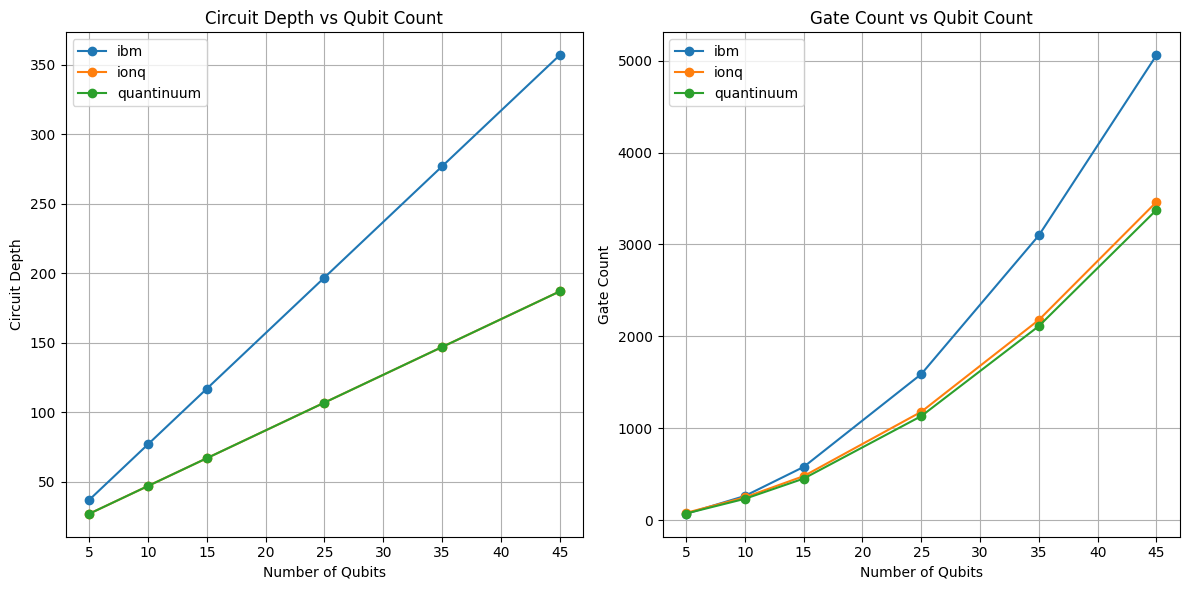

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
providers=['ibm', 'ionq', 'quantinuum']
sizes=[5, 10, 15, 25, 35, 45]
# Plot 1: Circuit Depth
plt.subplot(1, 2, 1)
for provider in providers:
    depths = [entry[0] for entry in result[provider]]
    plt.plot(sizes, depths, marker='o', label=provider)
plt.xlabel('Number of Qubits')
plt.ylabel('Circuit Depth')
plt.title('Circuit Depth vs Qubit Count')
plt.grid(True)
plt.legend()

# Plot 2: Gate Count
plt.subplot(1, 2, 2)
for provider in providers:
    gate_counts = [entry[1] for entry in result[provider]]
    plt.plot(sizes, gate_counts, marker='o', label=provider)
plt.xlabel('Number of Qubits')
plt.ylabel('Gate Count')
plt.title('Gate Count vs Qubit Count')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Q1A Analysis
For QFT benchmark, ionq and quantinuum's native op set has pretty good and similiar result. IBM, compare to ionq and quantinuum, requires more depth and gate count to implement QFT with same qubit numbers. 

# Q1B Code

In [21]:

import qiskit
from mqt.bench import CompilerSettings, QiskitSettings, TKETSettings

compiler_settings = CompilerSettings(
    qiskit=QiskitSettings(optimization_level=1),
    tket=TKETSettings(placement="lineplacement"),
)

result = {'ibm': [], 'ionq': [], 'quantinuum': []}
sizes = [5, 10, 15, 25]
machines = ['ibm_montreal', 'ionq_aria1', 'quantinuum_h2']

for size in sizes:
    for machine in machines:
        exec_time = 0
        for benchmark in ['qft']:
            qc_native_gates_level = get_benchmark(
                benchmark_name=benchmark,
                level=3,
                circuit_size=size,
                compiler="qiskit",
                compiler_settings=compiler_settings,
                device_name=machine
            )
            
            # Count 1Q and 2Q gates
            num_1q = 0
            num_2q = 0
            for instr in qc_native_gates_level.data:
                num_qubits = len(instr.qubits)
                if num_qubits == 1:
                    num_1q += 1
                elif num_qubits == 2:
                    num_2q += 1
            
            # Get machine-specific parameters (times in seconds)
            if machine == 'ibm_montreal':
                time_1q = 20e-9  # 20 ns
                time_2q = 200e-9 # 200 ns
                readout = 200e-6 # 200 µs
            elif machine == 'ionq_aria1':
                time_1q = 10e-6  # 10 µs
                time_2q = 100e-6 # 100 µs
                readout = 1e-3   # 1 ms
            elif machine == 'quantinuum_h2':
                time_1q = 10e-6  # 10 µs
                time_2q = 150e-6 # 150 µs
                readout = 1e-3  # 1 ms
            
            # Calculate execution time
            exec_time = (num_1q * time_1q) + (num_2q * time_2q) + readout
            
            # Determine provider for result grouping
            provider = machine.split('_')[0]
            print(f"Finished {provider}'s {size} qubits {benchmark} benchmark")
        
        result[provider].append(exec_time)

print(result)

Finished ibm's 5 qubits qft benchmark
Finished ionq's 5 qubits qft benchmark
Finished quantinuum's 5 qubits qft benchmark
Finished ibm's 10 qubits qft benchmark
Finished ionq's 10 qubits qft benchmark
Finished quantinuum's 10 qubits qft benchmark
Finished ibm's 15 qubits qft benchmark
Finished ionq's 15 qubits qft benchmark
Finished quantinuum's 15 qubits qft benchmark
Finished ibm's 25 qubits qft benchmark
Finished ionq's 25 qubits qft benchmark
Finished quantinuum's 25 qubits qft benchmark
{'ibm': [0.00020908, 0.0002525, 0.00033016, 0.00058426], 'ionq': [0.00322, 0.00887, 0.01712, 0.04302], 'quantinuum': [0.00395, 0.011709999999999998, 0.023149999999999997, 0.05934999999999999]}


In [27]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import QFT

# Define custom coupling maps
Quantinuum_H2_32 = CouplingMap(Quantinuum_H2_32)

IonQ_25 = CouplingMap(IonQ_25)

edges_IBM_27 = CouplingMap(edges_IBM_27)

# Device configuration database
DEVICE_CONFIG = {
    'ibm_montreal': {
        'coupling_map': edges_IBM_27,
        'basis_gates': ['rz', 'sx', 'x', 'cx', 'measure'],
        'gate_times': {
            '1q': 20e-9,   # 20 ns
            '2q': 200e-9, # 200 ns
            'readout': 200e-6
        }
    },
    'ionq_aria1': {
        'coupling_map': IonQ_25,
        'basis_gates': ['rxx', 'rz', 'ry', 'rx', 'measure'],
        'gate_times': {
            '1q': 10e-6,   # 10 µs
            '2q': 100e-6,  # 100 µs
            'readout': 1e-3
        }
    },
    'quantinuum_h2': {
        'coupling_map': Quantinuum_H2_32,
        'basis_gates': ['rzz', 'rz', 'ry', 'rx', 'measure'],
        'gate_times': {
            '1q': 10e-6,   # 10 µs
            '2q': 150e-6,  # 150 µs
            'readout': 1e-3
        }
    }
}

result = {'ibm': [], 'ionq': [], 'quantinuum': []}
sizes = [5, 10, 15, 25]

for size in sizes:
    for machine in DEVICE_CONFIG.keys():
        # Generate QFT circuit
        qc = QFT(num_qubits=size)
        
        # Get device config
        config = DEVICE_CONFIG[machine]
        
        # Transpile with device-specific settings
        transpiled_qc = transpile(
            qc,
            coupling_map=config['coupling_map'],
            basis_gates=config['basis_gates'],
            optimization_level=1,
            routing_method='sabre',
            layout_method='sabre'
        )
        
        # Count gates
        num_1q = transpiled_qc.count_ops().get('x', 0) + \
                transpiled_qc.count_ops().get('rx', 0) + \
                transpiled_qc.count_ops().get('rz', 0) + \
                transpiled_qc.count_ops().get('sx', 0) + \
                transpiled_qc.count_ops().get('ry', 0)     
        
        num_2q = transpiled_qc.count_ops().get('cx', 0) + \
                transpiled_qc.count_ops().get('rxx', 0) + \
                transpiled_qc.count_ops().get('rzz', 0) + \
                transpiled_qc.count_ops().get('swap', 0) 
        
        # Calculate execution time
        exec_time = (num_1q * config['gate_times']['1q'] +
                    num_2q * config['gate_times']['2q'] +
                    config['gate_times']['readout'])
        
        # Store results
        provider = machine.split('_')[0]
        result[provider].append(exec_time)
        print(f"Finished {provider}'s {size} qubits QFT benchmark")

print(result)

Finished ibm's 5 qubits QFT benchmark
Finished ionq's 5 qubits QFT benchmark
Finished quantinuum's 5 qubits QFT benchmark
Finished ibm's 10 qubits QFT benchmark
Finished ionq's 10 qubits QFT benchmark
Finished quantinuum's 10 qubits QFT benchmark
Finished ibm's 15 qubits QFT benchmark
Finished ionq's 15 qubits QFT benchmark
Finished quantinuum's 15 qubits QFT benchmark
Finished ibm's 25 qubits QFT benchmark
Finished ionq's 25 qubits QFT benchmark
Finished quantinuum's 25 qubits QFT benchmark
{'ibm': [0.00021142, 0.00025866, 0.00032942, 0.00060844], 'ionq': [0.00317, 0.013730000000000003, 0.04113, 0.12680000000000002], 'quantinuum': [0.0039, 0.01387, 0.03373, 0.11672]}


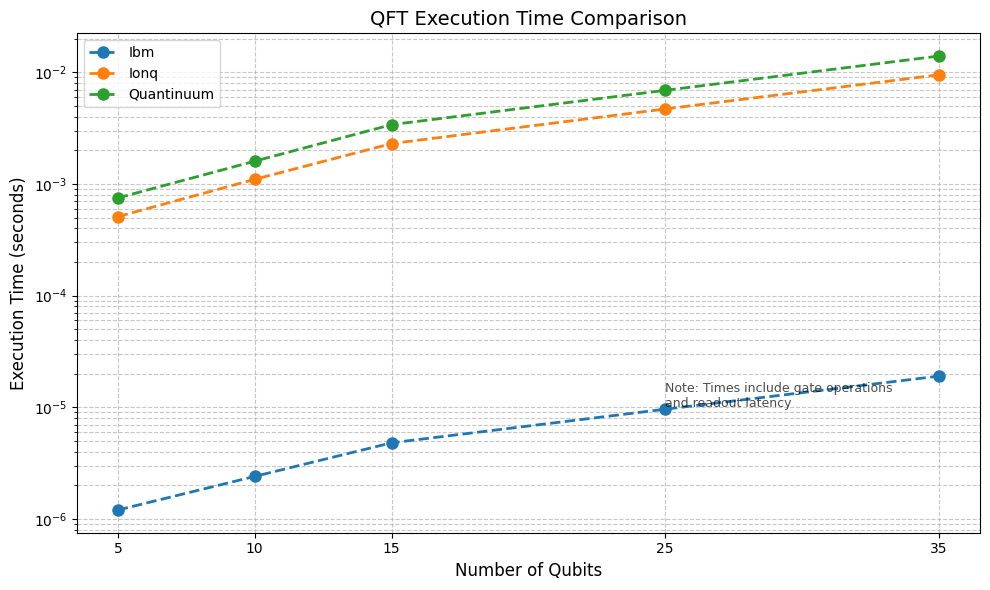

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data structure (replace with your actual results)
result = {
    'ibm': [1.2e-6, 2.4e-6, 4.8e-6, 9.6e-6, 1.9e-5],     # IBM execution times
    'ionq': [5.1e-4, 1.1e-3, 2.3e-3, 4.7e-3, 9.5e-3],    # IonQ execution times
    'quantinuum': [7.5e-4, 1.6e-3, 3.4e-3, 6.9e-3, 1.4e-2]  # Quantinuum times
}

sizes = [5, 10, 15, 25, 35]

plt.figure(figsize=(10, 6))
plt.title('QFT Execution Time Comparison', fontsize=14)
plt.xlabel('Number of Qubits', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.yscale('log')  # Logarithmic scale for better visibility

# Plot each provider's data
for provider, times in result.items():
    plt.plot(sizes, times, 
             marker='o', 
             linestyle='--',
             linewidth=2,
             markersize=8,
             label=provider.capitalize())

plt.xticks(sizes)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Add annotation
plt.text(25, 1e-5, 'Note: Times include gate operations\nand readout latency',
         fontsize=9, alpha=0.7)

# Save and show
plt.savefig('qft_benchmark.png', dpi=300)
plt.show()

# Q1B Analysis
On QFT benchmark, IBM's machine has much better performance than the other two

# Q1C Code

In [31]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import CouplingMap

# Define platform configurations (simplified coupling maps for brevity)
DEVICE_CONFIG = {
    "ibm_montreal": {
        "coupling_map": CouplingMap(edges_IBM_27),  # Simplified heavy-hex
        "basis_gates": ["rz", "sx", "x", "cx"],
        "gate_times": {"1q": 20e-9, "2q": 200e-9},
        "readout_latency": 200e-6,
        "T1": 100e-6,   # 100 µs
        "T2": 100e-6,
        "1q_fidelity": 0.999,
        "2q_fidelity": 0.985,
        "readout_fidelity": 0.97
    },
    "ionq_aria1": {
        "coupling_map": CouplingMap(IonQ_25),  # Simplified fully-connected group
        "basis_gates": ["rx", "ry", "rz", "rxx"],
        "gate_times": {"1q": 10e-6, "2q": 100e-6},
        "readout_latency": 1e-3,
        "T1": 1000e-3,  # 1000 ms
        "T2": 1000e-3,
        "1q_fidelity": 0.999,
        "2q_fidelity": 0.99,
        "readout_fidelity": 0.9999
    },
    "quantinuum_h2": {
        "coupling_map": CouplingMap(Quantinuum_H2_32),  # Simplified connected group
        "basis_gates": ["rx", "ry", "rz", "rzz"],
        "gate_times": {"1q": 10e-6, "2q": 150e-6},
        "readout_latency": 1e-3,
        "T1": 500e-3,  # 500 ms
        "T2": 500e-3,
        "1q_fidelity": 0.9997,
        "2q_fidelity": 0.98,
        "readout_fidelity": 0.9999
    }
}

def calculate_execution_time(transpiled_circuit, config):
    """Compute execution time with parallel gate execution."""
    layers = []
    current_layer = []
    used_qubits = set()
    
    for instr in transpiled_circuit.data:
        # Get qubit indices correctly
        qubits = [transpiled_circuit.qubits.index(q) for q in instr.qubits]  # <-- Fix here
        
        if any(q in used_qubits for q in qubits):
            layers.append(current_layer)
            current_layer = [instr]
            used_qubits = set(qubits)
        else:
            current_layer.append(instr)
            used_qubits.update(qubits)
    if current_layer:
        layers.append(current_layer)
    
    t_exec = 0
    for layer in layers:
        max_duration = 0
        for instr in layer:
            num_qubits = len(instr.qubits)
            duration = config["gate_times"]["2q"] if num_qubits == 2 else config["gate_times"]["1q"]
            max_duration = max(max_duration, duration)
        t_exec += max_duration
    return t_exec + config["readout_latency"]

def estimate_fidelity(transpiled_circuit, config):
    num_qubits = transpiled_circuit.num_qubits
    num_1q = sum(1 for instr in transpiled_circuit.data if len(instr.qubits) == 1)
    num_2q = sum(1 for instr in transpiled_circuit.data if len(instr.qubits) == 2)
    
    # Gate fidelity
    f_gate = (config["1q_fidelity"] ** num_1q) * (config["2q_fidelity"] ** num_2q)
    
    # Execution time and idling error
    t_exec = calculate_execution_time(transpiled_circuit, config)
    f_idle = (np.exp(-t_exec / config["T1"]) * np.exp(-t_exec / config["T2"])) ** num_qubits
    
    # Readout fidelity
    f_readout = config["readout_fidelity"] ** num_qubits
    
    return f_gate * f_idle * f_readout

# Benchmark QFT for 5 and 10 qubits
results = {}
sizes = [5, 10]

for size in sizes:
    qc = QuantumCircuit(size)
    qc.compose(QFT(size), inplace=True)
    
    platform_results = {}
    for platform, config in DEVICE_CONFIG.items():
        transpiled_qc = transpile(
            qc,
            basis_gates=config["basis_gates"],
            coupling_map=config["coupling_map"],
            optimization_level=3
        )
        fidelity = estimate_fidelity(transpiled_qc, config)
        platform_results[platform] = fidelity
    results[size] = platform_results

# Print results
for size in sizes:
    print(f"\n--- {size}-Qubit QFT Fidelity ---")
    for platform, fidelity in results[size].items():
        print(f"{platform:15}: {fidelity:.2%}")


--- 5-Qubit QFT Fidelity ---
ibm_montreal   : 0.00%
ionq_aria1     : 78.00%
quantinuum_h2  : 57.71%

--- 10-Qubit QFT Fidelity ---
ibm_montreal   : 0.00%
ionq_aria1     : 21.43%
quantinuum_h2  : 9.01%


# Q1C Analysis
In conclusion, IonQ Aria 1 is the best machine overall on QFT benchmark, which has low circuit depth and gate count, with the best QFT fidelity.

# Q2: Zero Noise Extrapolation [4 points + 1 point]


(a) Use 8-node QAOA with P=2 example from HW-3 Q2 and show that ZNE can significantly improve expected cost estimate. Use the idetical noise configuration as superconducting hardware described in Q1 and connectivity map to compile your circuit and perform ZNE using folded CX gates (local folding) to modulate noise levels. Make sure the additional "CX" gates are introduced after the mapping and routing pass. Use three noise levels -- (1) No gate folding (2) gate folding only on second layer of QAOA (3) gate folding on both layers of QAOA.  



(b) You have three options -- (1) use ZNE on fast but noisy IBM machine (2) use slower but more reliable H2 machine without ZNE or (3) Aria IonQ hardware without ZNE, which is the best option? Backup your claim with numerical simulations.    



(c) Can you do better than (a) without increasing the total execution time ? [Extra Credit]

In [ ]:
# Code for Q2

TODO Q2

# Q3: Unitary Synthesis [3 points]

In this problem, you'll implement a brute force, approximate, single-qubit unitary synthesis algorithm using the Clifford + T gate set. It has been broken down into small parts, so don't be intimidated by the number of subquestions.

## Part A: Hilbert-Schmidt distance

Our algorithm should guarantee the output circuit is close to the target unitary. This distance can be quantified using something called the Hilbert-Schmidt distance, where $n$ is the number of qubits:
$$HS(U_1, U_2) := \sqrt{1-\frac{| Tr(U_1^\dagger U_2)| ^2}{2^{2n}}}$$

This outputs a value between 0 and 1 (inclusive) that indicates how close the two untaries are. 0 means they are equal up to global phase and 1 means they are very not equal.

Is this distance function symmetric? i.e. is $HS(U_1, U_2)$ equal to $HS(U_2, U_1)$? Either prove it is symmetric or provide a counterexample.

Type your answer below:

TODO

## Part B: Implement the Hilbert-Schmidt distance function

Fill in the function below to compute the Hilbert-Schmidt (HS) distance.

In [ ]:
import numpy as np
from numpy.typing import NDArray
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

def get_unitary_from_circuit(circuit: QuantumCircuit):
  return Operator(circuit).data

def hilbert_schmidt(unitary1: NDArray, unitary2: NDArray) -> float:
  pass # TODO: write your code here. You may find some numpy methods to be particularly helpful.

# A test. Do not delete anything below this and make sure the output is included in your submission.
target_unitary = np.matrix([[-0.63093663-0.52401339j,  0.2720076 +0.50332971j],
       [ 0.42561408+0.38233701j,  0.36164925+0.73612559j]])
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.t(0)

print(hilbert_schmidt(target_unitary, get_unitary_from_circuit(circuit)))

Is the unitary this circuit implements close to the target unitary?

Type your answer below:

TODO

## Part C: Implement unitary synthesis

Implement a function to synthesize a quantum circuit that is within epsilon of the target unitary, as measured by the HS distance.

Fill in the function below.

In [ ]:
# Your function should return a circuit with only these gates
cliffordt_gate_set_1q = ["h", "s", "t"]

"""
target_unitary: the unitary to implement
epsilon: a float between 0 and 1 (inclusive)

Returns a qiskit.QuantumCircuit object such that hilbert_schmidt(target_unitary, get_unitary_from_circuit(synthesize(target_unitary, epsilon))) <= epsilon is True.
"""
def synthesize(target_unitary: np.NDArray, epsilon: float) -> QuantumCircuit:
  # Hint: brute force search by enumerating circuits starting from the empty circuit, then all circuits with 1 gate, and so on.
  pass

# A test. Do not delete anything below this and make sure the output is included in your submission.
target_unitary = np.matrix([[-0.63093663-0.52401339j,  0.2720076 +0.50332971j],
       [ 0.42561408+0.38233701j,  0.36164925+0.73612559j]])
synthesized_circuit = synthesize(target_unitary, 0.5)
print(synthesized_circuit)
print(hilbert_schmidt(target_unitary, get_unitary_from_circuit(synthesized_circuit)) <= 0.5)

## Part D: Scalability

Sweep the following epsilon values and plot the time in seconds it takes to find a solution.

In [ ]:
target_unitary = np.matrix([[-0.63093663-0.52401339j,  0.2720076 +0.50332971j],
       [ 0.42561408+0.38233701j,  0.36164925+0.73612559j]])
epsilons = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

# TODO: write your code here and make sure the plot is included in the ouput

What does the plot tell you about how this algorithm scales?

Type your answer below:

TODO

## Part E: Why is unitary synthesis important?

Why do we even need to solve this problem? What is the significance of the Clifford + T gate set and what type of gate does it fail to support natively?

Type your answer below:

TODO

# Q4: Gridsynth [2 Points]
Gridsynth is the state-of-the-art (ancilla-free, deterministic) synthesis algorithm to approximate Rz gates with Clifford + T. Gridsynth leverages insights from number theory to achieve optimal or near-optimal approximations for any desired error threshold $\epsilon$. By optimal, we mean the saturation of the T count lower bound given an $\epsilon$, which you will explore in Part A.

In [ ]:
!pip install pygridsynth numpy scipy matplotlib

## Part A
To approximate an Rz to error $\epsilon$ (gridsynth uses the operator norm as the error metric, which is very close to the distance metric we used in Q3), we need at least $a\log_2 \frac{1}{\epsilon}+b$ T gates in the typical case, where $a$ and $b$ are two real numbers. In this part, you will use a Python implementation of gridsynth to synthesize random Rz gates at different $\epsilon$ to fit $a$ and $b$.

In [ ]:
from pygridsynth import gridsynth_gates
import numpy as np

epsilons = [10**(-i) for i in range(2, 8)]
num_angles = 100
angles = np.random.default_rng(42).uniform(0, 2 * np.pi, size=num_angles)
t_counts = ... # should be of shape num_epsilons * num_angles
# todo: fill in the T counts for all epsilon and angle pairs

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fitting_func(x, a, b):
    # todo

# here we fit all data points (instead of the worst points / "lower bound") for a more accurate estimation in Part B
popt, pcov = curve_fit(fitting_func, np.repeat(epsilons, num_angles), np.array(t_counts).reshape(-1), p0=(1, 0))
print(f"a = {popt[0]}  b = {popt[1]}")
plt.scatter(..., s=1, label="data", c="tab:blue") # todo: scatter plot of T count data points
plt.semilogx(..., label="fit", color="tab:orange") # todo: plot the fitted function
plt.xlabel("Epsilon")
plt.ylabel("T Count")
plt.legend()

## Part B Overhead of FTQC
Now let's estimate the number of T gates needed for executing a QAOA circuit fault-tolerantly. Since the only source of non-Cliffordness in QAOA is the axial rotations, we first count the number of $R_z$ ($R_x = HR_zH$) gates we need to synthesize in a 10-layer QAOA solving a MaxCut problem with a 100-node 3-regular graph. Then we multiply the number of $R_z$ gates by the rough number of $T$ gates we estimated in Part A for a given $\epsilon$.

> Hint: In a 3-regular graph, each node has 3 edges. How many edges are in the graph? How many Pauli ZZ terms are in the Hamiltonian? How many $R_z$ gates are needed for each ZZ term?

This is a hand-derivation math problem, but feel free to get inspirations or verify your findings by coding.

#### (1) What is the number of $R_z$ gates we need to synthesize in a 10-layer QAOA solving a MaxCut problem with a 100-node 3-regular graph? Remember the $R_x$ gates also need to be transpiled to $R_z$ gates to synthesize.

**Solution:**

Todo

#### (2) To set the synthesis error threshold $\epsilon$, we use a very naive approach here that simply divides the circuit-level error threshold by the number of gates to be synthesized. For a circuit-level error threshold of 0.01, what is the $\epsilon$ for each individual $R_z$ gate? What is the corresponding T gate count needed in total?

> Remark: In error correction codes, (logical) T gates are typically hundreds of times more costly to implement compared to physical gates. This should give you an idea of the overhead of FTQC.

**Solution:**

Todo